In [89]:
from pickle import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_k_fit = load(open("ml_unsupervised_model_personality_test.pkl", 'rb'))          ## Version of pickling and unpickling matters.
min_max_scaler = load(open("scaler.pkl", 'rb'))

In [3]:
x = [i for i in range(1,6)]
my_data = []
for i in range(10):
    my_data+= x

my_data = np.array(my_data).reshape(1,-1)

In [4]:
my_data

array([[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2,
        3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4,
        5, 1, 2, 3, 4, 5]])

In [5]:
my_data = min_max_scaler.transform(my_data)

In [6]:
my_personality = model_k_fit.predict(my_data)                  

In [7]:
my_personality

array([4], dtype=int32)

In [82]:
col_list = my_data[0]
print(col_list)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

[0.2 0.4 0.6 0.8 1.  0.2 0.4 0.6 0.8 1.  0.2 0.4 0.6 0.8 1.  0.2 0.4 0.6
 0.8 1.  0.2 0.4 0.6 0.8 1.  0.2 0.4 0.6 0.8 1.  0.2 0.4 0.6 0.8 1.  0.2
 0.4 0.6 0.8 1.  0.2 0.4 0.6 0.8 1.  0.2 0.4 0.6 0.8 1. ]


In [83]:
ext

array([0.2, 0.4, 0.6, 0.8, 1. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [84]:
ext = np.array([sum(ext)], dtype='int32')
est = np.array([sum(est)], dtype='int32')
agr = np.array([sum(agr)], dtype='int32')
csn = np.array([sum(csn)], dtype='int32')
opn = np.array([sum(opn)], dtype='int32')

In [88]:
ext

array([6], dtype=int32)

#### The results are out of 10, because I used MinMaxScaler which coverted training data from [[1,5]] ---> [[0,1]], and now the test data is also transformed between [[0,1]] and 10 summation of it would be [[0,10]].

In [86]:


my_sums = pd.DataFrame()
my_sums['extroversion'] = ext
my_sums['neurotic'] = est
my_sums['agreeable'] = agr
my_sums['conscientious'] = csn
my_sums['open'] = opn
my_sums['cluster'] = my_personality
# print('Sum of my question groups')
my_sums

,extroversion,neurotic,agreeable,conscientious,open,cluster
0,6,6,6,6,6,4


In [87]:
my_sums

,extroversion,neurotic,agreeable,conscientious,open,cluster
0,6,6,6,6,6,4


<AxesSubplot:>

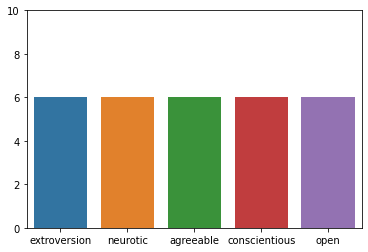

In [99]:
plt.ylim(0, 10)
sns.barplot(x=my_sums.columns[:-1], y=my_sums.values[0][:-1])